#### Analysis of multiple stocks - for simulation over the course of 2 years (bi-weekly buy in)

Goal: This script simulates 2 years of bi-weekly pred/close determinations and simulates for a series of chosen stocks if it is better to invest a consistent price or buy in higher/lower depending on the current performance of the stock.

Take any number of stocks and run a trendline through multiple 1 year cycles, creating a linear prediction to be applied bi-weekly. Assess the theoretical performance of adjusting bi-weekly contributions as compared to contributing a consistent amount every other week


In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [2]:
# Arguments     Scenarios                                                                             Example value

# period        date period to download                                     1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y, ytd, max
# interval      data interval. If it’s intraday data, the interval needs to be set within 60 days 1m, 2m, 5m, 15m, 30m, 60m, 90m, 1h, 1d, 5d, 1wk, 1mo, 3mo
# start         If period is not set- Download start date string (YYYY-MM-DD) or datetime             2020-03-18
# end           If period is not set - Download end date string (YYYY-MM-DD) or datetime              2020-03-19
# prepost       Boolean value to include Pre and Post market data                                     Default is False
# auto_adjust   Boolean value to adjust all OHLC                                                      Default is True
# actions       Boolean value download stock dividends and stock splits events                        Default is True

In [3]:
# choose stocks of interest
# stocks chosen must all have data for full range of dates
lista = ['AAPL', 'AMD', 'AMZN', 'CRM', 'GOOG', 'INTC', 'MDB', 'MSFT', 'NVDA', 'QQQ', 'SBUX', 'SQ', 'TSLA', 'TSM']

# choose how much to contribute each bi-weekly period
biwkly_contrib = 10 

# max amount to contribute per stock over the course of 2 years
# should be at least 50 times the bi-weekly contrib
invest = biwkly_contrib*50

In [4]:
# Pull the closing data

data = yf.download(
        tickers = lista
        ,period = '3y'
        #,start = '2015-03-31' # to choose custom date ranges
        #,end = '2019-01-01' # to choose custom date ranges
    )

df = data['Close']
df = df.dropna() # in case the first row generates as nulls
df['Index'] = np.arange(1,len(df)+1) # add an index
df

[*********************100%***********************]  14 of 14 completed


,AAPL,AMD,AMZN,CRM,GOOG,INTC,MDB,MSFT,NVDA,QQQ,SBUX,SQ,TSLA,TSM,Index
Date,,,,,,,,,,,,,,,
2018-09-10,54.582500,29.889999,1939.010010,151.320007,1164.640015,46.299999,83.300003,109.379997,68.682503,181.720001,54.970001,89.389999,57.099998,44.619999,1
2018-09-11,55.962502,30.100000,1987.150024,152.839996,1177.359985,44.930000,84.769997,111.239998,68.199997,183.119995,55.119999,92.279999,55.888000,44.549999,2
2018-09-12,55.267502,32.209999,1990.000000,155.369995,1162.819946,44.930000,81.940002,111.709999,67.050003,182.580002,54.970001,90.440002,58.108002,43.939999,3
2018-09-13,56.602501,30.480000,1989.869995,158.179993,1175.329956,45.570000,81.199997,112.910004,67.834999,184.529999,54.889999,90.220001,57.891998,43.430000,4
2018-09-14,55.959999,32.720001,1970.189941,157.490005,1172.530029,45.540001,81.989998,113.370003,69.107498,183.990005,54.750000,90.820000,59.040001,44.410000,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-01,152.509995,109.989998,3479.000000,268.320007,2916.840088,53.669998,393.429993,301.829987,224.410004,380.579987,117.449997,268.250000,734.090027,120.459999,751
2021-09-02,153.649994,109.199997,3463.120117,264.149994,2884.379883,53.730000,401.649994,301.149994,223.960007,380.399994,117.370003,265.940002,732.390015,120.790001,752
2021-09-03,154.300003,109.919998,3478.050049,267.079987,2895.500000,53.509998,507.410004,301.140015,228.429993,381.570007,117.190002,269.739990,733.570007,123.970001,753


In [5]:
# create 50 dataframes in a dictionary, each 260 days: dataframes['data0'] - dataframes['data49']
# 0 is the most recent 260 days, 49 is the oldest
# 260 days isn't exactly 1 trading year, but I think it's close enough

dataframes = {}

for j in lista:
    x = (max(df['Index']))-260
    y = max(df['Index'])

    for i in range(50):
        dataframes['data' + str(i)] = df.iloc[x:y]
        x -= 10
        y -= 10

print(dataframes['data0'])
print(dataframes['data49'])

                  AAPL         AMD         AMZN         CRM         GOOG  \
Date                                                                       
2020-08-27  125.010002   83.800003  3400.000000  276.320007  1634.329956   
2020-08-28  124.807503   85.550003  3401.800049  271.100006  1644.410034   
2020-08-31  129.039993   90.820000  3450.959961  272.649994  1634.180054   
2020-09-01  134.179993   92.180000  3499.120117  281.250000  1660.709961   
2020-09-02  131.399994   90.220001  3531.449951  276.690002  1728.280029   
...                ...         ...          ...         ...          ...   
2021-09-01  152.509995  109.989998  3479.000000  268.320007  2916.840088   
2021-09-02  153.649994  109.199997  3463.120117  264.149994  2884.379883   
2021-09-03  154.300003  109.919998  3478.050049  267.079987  2895.500000   
2021-09-07  156.690002  109.150002  3509.290039  265.209991  2910.379883   
2021-09-08  155.899902  107.540001  3539.333496  262.890015  2903.020020   

           

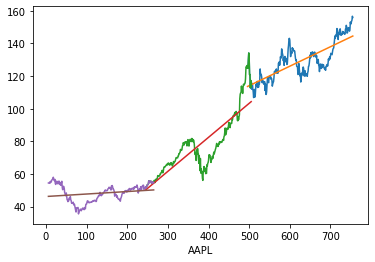

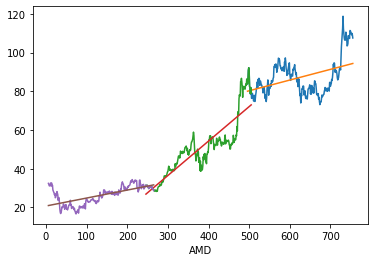

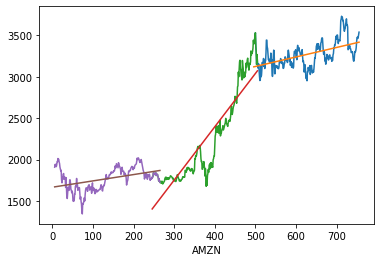

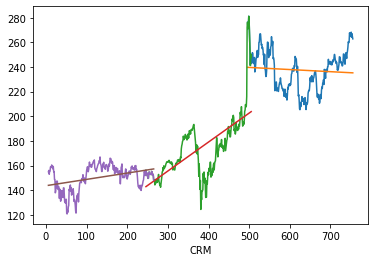

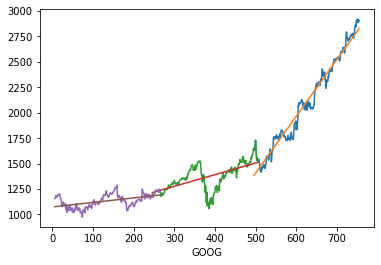

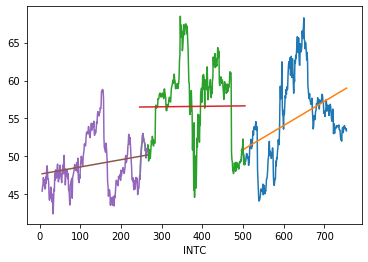

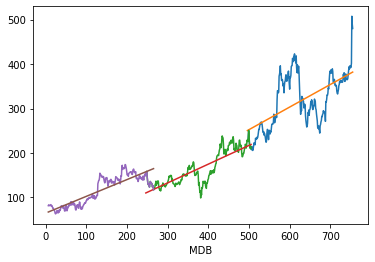

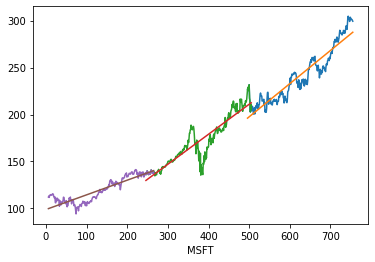

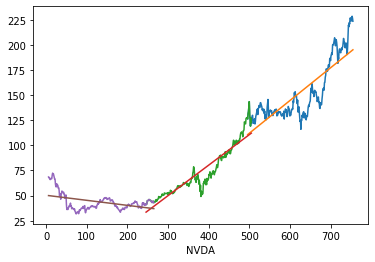

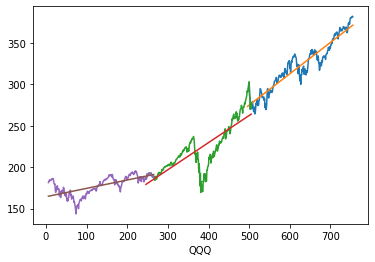

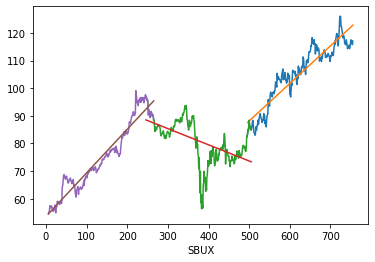

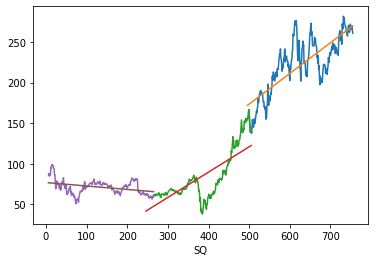

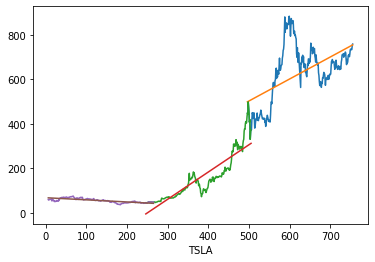

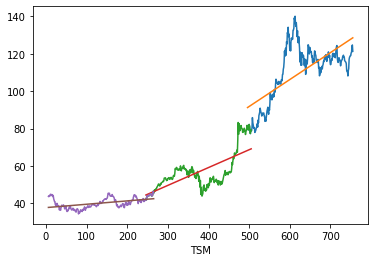

In [6]:
# plot 3 1-year segments of data with their associated trendlines

for i in lista:
    # plot data with a trendline - most recent 260 days
    x = dataframes['data0']['Index']
    y = dataframes['data0'][str(i)]
    plt.plot(x, y)
    m, b = np.polyfit(x, y, 1)
    plt.plot(x, m*x + b)

    # plot data with a trendline - the middle 260 days
    x = dataframes['data25']['Index']
    y = dataframes['data25'][str(i)]
    plt.plot(x, y)
    m, b = np.polyfit(x, y, 1)
    plt.plot(x, m*x + b)

    # plot data with a trendline - the oldest 260 days
    x = dataframes['data49']['Index']
    y = dataframes['data49'][str(i)]
    plt.plot(x, y)
    m, b = np.polyfit(x, y, 1)
    plt.plot(x, m*x + b)

    plt.xlabel(i)
    plt.show()

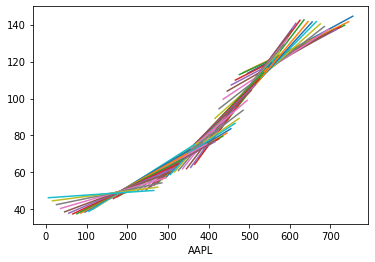

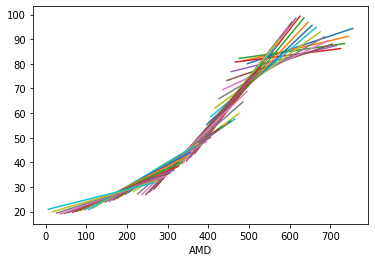

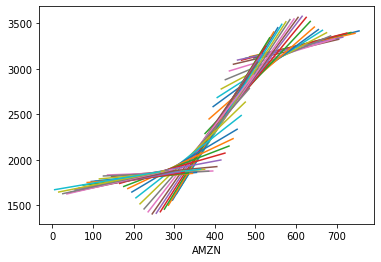

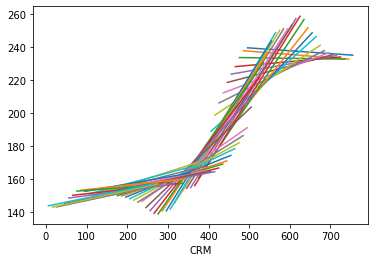

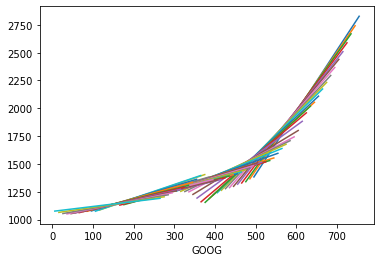

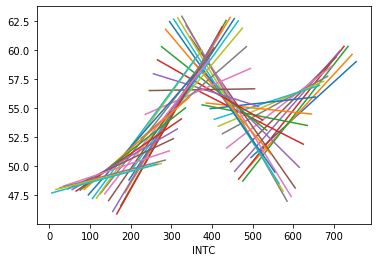

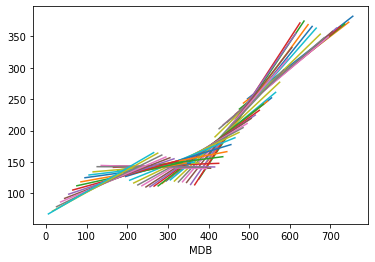

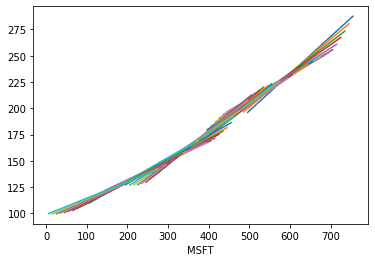

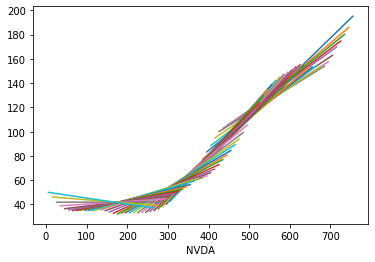

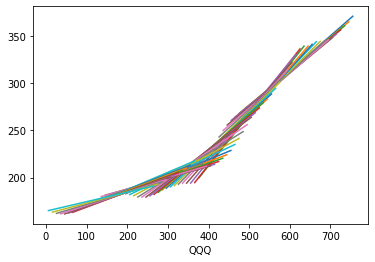

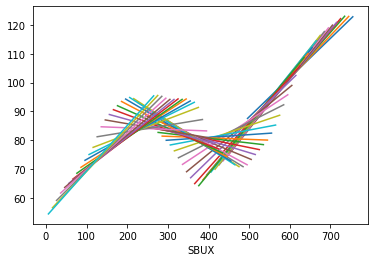

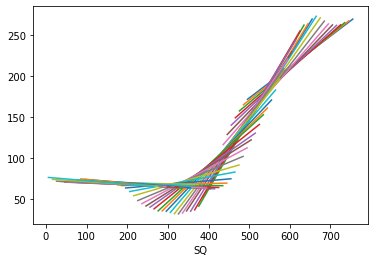

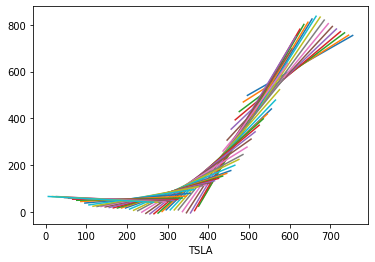

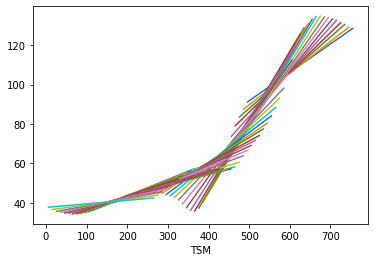

In [7]:
# plot only trendlines, bi-weekly, each line representing 1 year of data
# if the movement is too stable, these graphs won't be useable

for j in lista:
    for i in range(len(dataframes)):
        x = dataframes['data' + str(i)]['Index']
        y = dataframes['data' + str(i)][str(j)]

        m, b = np.polyfit(x, y, 1)
        plt.plot(x, m*x + b)

    plt.xlabel(j)
    plt.show()

In [8]:
# create pred and pred/close list for each of the 50 dataframes
# may take 30+ seconds to run

k = len(dataframes)

for j in lista:
    for e in range(k):
        nlist = []
        ylist = []
        y = dataframes['data' + str(e)][str(j)]

        for i in range(1,len(dataframes['data0'])+1): # create pred
            x = range(260)
            m, b = np.polyfit(x, y, 1)
            d = m*i+b
            nlist.append(d)

        dataframes['data' + str(e)][str(j) + ' pred'] = nlist

        for i in range(1,len(dataframes['data0'])+1): # create pred/close
            d = (dataframes['data' + str(e)][str(j) + ' pred'].iloc[i-1])/(dataframes['data' + str(e)][str(j)].iloc[i-1])
            ylist.append(d)

        dataframes['data' + str(e)][str(j) + ' pred/close'] = ylist

dataframes['data0']

C:\Users\james\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\james\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,AAPL,AMD,AMZN,CRM,GOOG,INTC,MDB,MSFT,NVDA,QQQ,...,QQQ pred,QQQ pred/close,SBUX pred,SBUX pred/close,SQ pred,SQ pred/close,TSLA pred,TSLA pred/close,TSM pred,TSM pred/close
Date,,,,,,,,,,,,,,,,,,,,,
2020-08-27,125.010002,83.800003,3400.000000,276.320007,1634.329956,49.400002,227.210007,226.580002,126.282501,291.049988,...,273.663795,0.940264,87.707193,1.051519,172.365005,1.107673,499.546255,1.115681,91.380017,1.133747
2020-08-28,124.807503,85.550003,3401.800049,271.100006,1644.410034,50.430000,225.910004,228.910004,131.477493,292.529999,...,274.042226,0.936800,87.843221,1.033450,172.743080,1.107825,500.533887,1.130690,91.523955,1.137792
2020-08-31,129.039993,90.820000,3450.959961,272.649994,1634.180054,50.950001,233.800003,225.529999,133.744995,294.880005,...,274.420657,0.930618,87.979248,1.041544,173.121155,1.084991,501.521519,1.006425,91.667892,1.156693
2020-09-01,134.179993,92.180000,3499.120117,281.250000,1660.709961,50.790001,250.720001,227.270004,138.210007,299.920013,...,274.799088,0.916241,88.115275,1.024001,173.499230,1.041037,502.509151,1.057803,91.811830,1.125835
2020-09-02,131.399994,90.220001,3531.449951,276.690002,1728.280029,52.250000,239.529999,231.649994,143.464996,302.760010,...,275.177519,0.908897,88.251302,0.998883,173.877305,1.067518,503.496783,1.125459,91.955768,1.119092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-01,152.509995,109.989998,3479.000000,268.320007,2916.840088,53.669998,393.429993,301.829987,224.410004,380.579987,...,370.163653,0.972630,122.394098,1.042095,268.774075,1.001954,751.392403,1.023570,128.084146,1.063292
2021-09-02,153.649994,109.199997,3463.120117,264.149994,2884.379883,53.730000,401.649994,301.149994,223.960007,380.399994,...,370.542084,0.974085,122.530125,1.043965,269.152150,1.012078,752.380035,1.027294,128.228084,1.061579
2021-09-03,154.300003,109.919998,3478.050049,267.079987,2895.500000,53.509998,507.410004,301.140015,228.429993,381.570007,...,370.920515,0.972090,122.666153,1.046729,269.530225,0.999222,753.367667,1.026988,128.372022,1.035509


In [9]:
# pull the last 'Close' and pred/close' from each dataframe in dataframes and make a new dataframe out of it
# each row is the last close price in a 1-year period and the final pred/close derived from a 1-year trendline
# the rows have a 50 week overlap and are separated by 2 weeks

df = pd.DataFrame()
add_index = np.arange(1,len(dataframes)+1)
df['Index'] = add_index

for j in lista:
    nlist = []
    ylist = []
    k = len(dataframes['data0'])

    for e in reversed(range(len(dataframes))):
        nlist.append(round(dataframes['data' + str(e)][str(j) + ' pred/close'].iloc[k-1],4))
        ylist.append(round(dataframes['data' + str(e)][str(j)].iloc[k-1],4))

    df[str(j)] = pd.DataFrame(ylist)
    df[str(j) + ' pred/close'] = pd.DataFrame(nlist)

df.tail(10)

,Index,AAPL,AAPL pred/close,AMD,AMD pred/close,AMZN,AMZN pred/close,CRM,CRM pred/close,GOOG,...,QQQ,QQQ pred/close,SBUX,SBUX pred/close,SQ,SQ pred/close,TSLA,TSLA pred/close,TSM,TSM pred/close
40,41,131.4600,1.0787,81.62,1.1630,3467.4199,0.9885,230.32,1.0715,2410.1201,...,337.99,1.0196,114.490,1.0014,244.82,1.1199,709.44,1.1828,116.740,1.1545
41,42,127.4500,1.1032,74.59,1.2480,3222.8999,1.0551,217.66,1.1094,2316.1599,...,326.39,1.0570,111.200,1.0481,207.85,1.3095,589.74,1.4164,112.460,1.2003
42,43,124.6100,1.1168,80.08,1.1374,3223.0701,1.0440,238.10,1.0002,2411.5601,...,333.93,1.0342,113.880,1.0350,222.52,1.2051,625.22,1.3151,117.360,1.1469
43,44,130.4800,1.0542,81.55,1.0973,3383.8701,0.9845,246.26,0.9614,2527.0400,...,344.51,1.0061,112.450,1.0593,230.95,1.1456,617.69,1.3063,120.990,1.1099
44,45,134.7800,1.0152,87.08,1.0113,3443.8899,0.9660,244.57,0.9632,2536.3899,...,353.71,0.9868,112.240,1.0698,246.60,1.0678,688.72,1.1538,119.610,1.1167
45,46,145.6400,0.9441,90.26,0.9691,3677.3601,0.9109,244.02,0.9633,2619.8899,...,362.42,0.9735,119.550,1.0122,241.43,1.0881,668.54,1.1722,123.900,1.0722
46,47,146.7700,0.9463,91.03,0.9473,3626.3899,0.9362,243.51,0.9617,2735.9299,...,364.43,0.9802,126.030,0.9707,251.73,1.0463,644.78,1.1978,113.540,1.1590
47,48,145.6000,0.9601,106.48,0.8289,3320.6799,1.0245,243.39,0.9569,2761.9299,...,366.84,0.9856,116.390,1.0580,273.08,0.9741,709.99,1.0802,116.360,1.1230
48,49,149.6200,0.9471,107.65,0.8472,3305.7800,1.0263,259.66,0.8967,2847.9700,...,374.37,0.9771,115.080,1.0695,270.17,0.9924,708.49,1.0681,112.110,1.1529
49,50,155.8999,0.9280,107.54,0.8780,3539.3335,0.9660,262.89,0.8949,2903.0200,...,381.52,0.9742,116.965,1.0511,260.85,1.0362,758.03,0.9965,121.285,1.0608


In [10]:
# determine the weeks where pred/close is >1 and therefore they are better weeks to buy in
# steady stocks could be at about 50/50 but stocks exponentially rising could have close to 0 pred/close > 1

for j in lista:
    nlist = []
    for i in range(len(df)):
        if df[str(j) + ' pred/close'].iloc[i] >= 1:
            nlist.append(1)
        else:
            nlist.append(0)

    df[str(j) + ' >1'] = nlist

df.tail(10)

,Index,AAPL,AAPL pred/close,AMD,AMD pred/close,AMZN,AMZN pred/close,CRM,CRM pred/close,GOOG,...,GOOG >1,INTC >1,MDB >1,MSFT >1,NVDA >1,QQQ >1,SBUX >1,SQ >1,TSLA >1,TSM >1
40,41,131.4600,1.0787,81.62,1.1630,3467.4199,0.9885,230.32,1.0715,2410.1201,...,0,0,1,0,1,1,1,1,1,1
41,42,127.4500,1.1032,74.59,1.2480,3222.8999,1.0551,217.66,1.1094,2316.1599,...,0,1,1,1,1,1,1,1,1,1
42,43,124.6100,1.1168,80.08,1.1374,3223.0701,1.0440,238.10,1.0002,2411.5601,...,0,1,1,1,0,1,1,1,1,1
43,44,130.4800,1.0542,81.55,1.0973,3383.8701,0.9845,246.26,0.9614,2527.0400,...,0,1,1,0,0,1,1,1,1,1
44,45,134.7800,1.0152,87.08,1.0113,3443.8899,0.9660,244.57,0.9632,2536.3899,...,0,1,0,0,0,0,1,1,1,1
45,46,145.6400,0.9441,90.26,0.9691,3677.3601,0.9109,244.02,0.9633,2619.8899,...,0,1,1,0,0,0,1,1,1,1
46,47,146.7700,0.9463,91.03,0.9473,3626.3899,0.9362,243.51,0.9617,2735.9299,...,0,1,1,0,0,0,0,1,1,1
47,48,145.6000,0.9601,106.48,0.8289,3320.6799,1.0245,243.39,0.9569,2761.9299,...,0,1,1,0,0,0,1,0,1,1
48,49,149.6200,0.9471,107.65,0.8472,3305.7800,1.0263,259.66,0.8967,2847.9700,...,0,1,0,0,0,0,1,0,1,1
49,50,155.8999,0.9280,107.54,0.8780,3539.3335,0.9660,262.89,0.8949,2903.0200,...,0,1,0,0,0,0,1,1,0,1


#### At this point, the foundation is set and strategies can be created and tested.

In [11]:
# square the pred/close number as a more extreme option for calculations

for j in lista:
    df[str(j) +' pred/close2'] = round(df[str(j) +' pred/close']**2,4) # make the value differences a little more pronounced

df.tail(10)

,Index,AAPL,AAPL pred/close,AMD,AMD pred/close,AMZN,AMZN pred/close,CRM,CRM pred/close,GOOG,...,GOOG pred/close2,INTC pred/close2,MDB pred/close2,MSFT pred/close2,NVDA pred/close2,QQQ pred/close2,SBUX pred/close2,SQ pred/close2,TSLA pred/close2,TSM pred/close2
40,41,131.4600,1.0787,81.62,1.1630,3467.4199,0.9885,230.32,1.0715,2410.1201,...,0.8163,0.9805,1.4950,0.9683,1.0607,1.0396,1.0028,1.2542,1.3990,1.3329
41,42,127.4500,1.1032,74.59,1.2480,3222.8999,1.0551,217.66,1.1094,2316.1599,...,0.9328,1.0727,1.8371,1.0110,1.1660,1.1172,1.0985,1.7148,2.0062,1.4407
42,43,124.6100,1.1168,80.08,1.1374,3223.0701,1.0440,238.10,1.0002,2411.5601,...,0.9090,1.0227,1.4252,1.0110,0.8995,1.0696,1.0712,1.4523,1.7295,1.3154
43,44,130.4800,1.0542,81.55,1.0973,3383.8701,0.9845,246.26,0.9614,2527.0400,...,0.8806,1.0153,1.0173,0.9460,0.7670,1.0122,1.1221,1.3124,1.7064,1.2319
44,45,134.7800,1.0152,87.08,1.0113,3443.8899,0.9660,244.57,0.9632,2536.3899,...,0.9287,1.0679,0.8471,0.9067,0.6659,0.9738,1.1445,1.1402,1.3313,1.2470
45,46,145.6400,0.9441,90.26,0.9691,3677.3601,0.9109,244.02,0.9633,2619.8899,...,0.9206,1.1122,1.0716,0.8636,0.7048,0.9477,1.0245,1.1840,1.3741,1.1496
46,47,146.7700,0.9463,91.03,0.9473,3626.3899,0.9362,243.51,0.9617,2735.9299,...,0.8985,1.2878,1.0337,0.8724,0.8292,0.9608,0.9423,1.0947,1.4347,1.3433
47,48,145.6000,0.9601,106.48,0.8289,3320.6799,1.0245,243.39,0.9569,2761.9299,...,0.9376,1.2519,1.0308,0.9128,0.8192,0.9714,1.1194,0.9489,1.1668,1.2611
48,49,149.6200,0.9471,107.65,0.8472,3305.7800,1.0263,259.66,0.8967,2847.9700,...,0.9305,1.2288,0.9419,0.8603,0.7298,0.9547,1.1438,0.9849,1.1408,1.3292
49,50,155.8999,0.9280,107.54,0.8780,3539.3335,0.9660,262.89,0.8949,2903.0200,...,0.9522,1.2239,0.6347,0.9253,0.7644,0.9491,1.1048,1.0737,0.9930,1.1253


In [29]:
# Create all of the strategies to test 

for j in lista:
    
# baseline - buy in $10 bi-weekly no matter what - baseline
    df[str(j) +' baseline'] = 0
    df[str(j) +' baseline_stk'] = 0
    v = invest
    for i in range(len(df)):
        df[str(j) +' baseline'].iloc[i] = biwkly_contrib
        df[str(j) +' baseline_stk'].iloc[i] = round(df[str(j) +' baseline'].iloc[i]/df[str(j)].iloc[i],4)
        v -= biwkly_contrib
        if v < biwkly_contrib:
            break

# opt1 - buy in every other week but proportionally to the pred/close
    df[str(j) +' opt1'] = 0
    df[str(j) +' opt1_stk'] = 0
    v = invest
    for i in range(len(df)):
        df[str(j) +' opt1'].iloc[i] = biwkly_contrib*df[str(j) +' pred/close'].iloc[i]
        df[str(j) +' opt1_stk'].iloc[i] = round(df[str(j) +' opt1'].iloc[i]/df[str(j)].iloc[i],4)
        v -= biwkly_contrib*df[str(j) +' pred/close'].iloc[i]
        if i == (len(df)-1):
            t = i
        else:
            t = i+1
        if v < biwkly_contrib*df[str(j) +' pred/close'].iloc[t]:
            break

# opt2 - buy in every other week but proportionally to the square of pred/close
    df[str(j) +' opt2'] = 0
    df[str(j) +' opt2_stk'] = 0
    v = invest
    for i in range(len(df)):
        df[str(j) +' opt2'].iloc[i] = biwkly_contrib*df[str(j) +' pred/close2'].iloc[i]
        df[str(j) +' opt2_stk'].iloc[i] = round(df[str(j) +' opt2'].iloc[i]/df[str(j)].iloc[i],4)
        v -= biwkly_contrib*df[str(j) +' pred/close2'].iloc[i]
        if i == (len(df)-1):
            t = i
        else:
            t = i+1
        if v < biwkly_contrib*df[str(j) +' pred/close2'].iloc[t]:
            break

# opt3 - buy in every other week. 0 on days <1 and twice the normal bi-weekly contribution on days >= 1
    df[str(j) +' opt3'] = 0
    df[str(j) +' opt3_stk'] = 0
    v = invest
    for i in range(len(df)):
        df[str(j) +' opt3'].iloc[i] = biwkly_contrib*2*df[str(j) +' >1'].iloc[i] 
        df[str(j) +' opt3_stk'].iloc[i] = round(df[str(j) +' opt3'].iloc[i]/df[str(j)].iloc[i],4)
        v -= biwkly_contrib*2*df[str(j) +' >1'].iloc[i]
        if i == (len(df)-1):
            t = i
        else:
            t = i+1
        if v < biwkly_contrib*2*df[str(j) +' >1'].iloc[t]:
            break

# opt4 - buy in every other week but proportionally to the inverse of pred/close
# This is more of a validation and will ideally return negative compared to baseline
    df[str(j) +' opt4'] = 0
    df[str(j) +' opt4_stk'] = 0
    v = invest
    for i in range(len(df)):
        df[str(j) +' opt4'].iloc[i] = round(biwkly_contrib/df[str(j) +' pred/close'].iloc[i],4)
        df[str(j) +' opt4_stk'].iloc[i] = round(df[str(j) +' opt4'].iloc[i]/df[str(j)].iloc[i],4)
        v -= biwkly_contrib/df[str(j) +' pred/close'].iloc[i]
        if i == (len(df)-1):
            t = i
        else:
            t = i+1
        if v < biwkly_contrib/df[str(j) +' pred/close'].iloc[t]:
            break

df.tail(10)

,Index,AAPL,AAPL pred/close,AMD,AMD pred/close,AMZN,AMZN pred/close,CRM,CRM pred/close,GOOG,...,TSM baseline,TSM baseline_stk,TSM opt1,TSM opt1_stk,TSM opt2,TSM opt2_stk,TSM opt3,TSM opt3_stk,TSM opt4,TSM opt4_stk
40,41,131.4600,1.0787,81.62,1.1630,3467.4199,0.9885,230.32,1.0715,2410.1201,...,10,0.0857,11.545,0.0989,13.329,0.1142,20,0.1713,8.6618,0.0742
41,42,127.4500,1.1032,74.59,1.2480,3222.8999,1.0551,217.66,1.1094,2316.1599,...,10,0.0889,12.003,0.1067,14.407,0.1281,20,0.1778,8.3313,0.0741
42,43,124.6100,1.1168,80.08,1.1374,3223.0701,1.0440,238.10,1.0002,2411.5601,...,10,0.0852,11.469,0.0977,13.154,0.1121,20,0.1704,8.7192,0.0743
43,44,130.4800,1.0542,81.55,1.0973,3383.8701,0.9845,246.26,0.9614,2527.0400,...,10,0.0827,11.099,0.0917,12.319,0.1018,20,0.1653,9.0098,0.0745
44,45,134.7800,1.0152,87.08,1.0113,3443.8899,0.9660,244.57,0.9632,2536.3899,...,10,0.0836,11.167,0.0934,12.470,0.1043,20,0.1672,8.9550,0.0749
45,46,145.6400,0.9441,90.26,0.9691,3677.3601,0.9109,244.02,0.9633,2619.8899,...,10,0.0807,10.722,0.0865,11.496,0.0928,20,0.1614,9.3266,0.0753
46,47,146.7700,0.9463,91.03,0.9473,3626.3899,0.9362,243.51,0.9617,2735.9299,...,10,0.0881,11.590,0.1021,13.433,0.1183,20,0.1761,8.6281,0.0760
47,48,145.6000,0.9601,106.48,0.8289,3320.6799,1.0245,243.39,0.9569,2761.9299,...,10,0.0859,11.230,0.0965,12.611,0.1084,20,0.1719,8.9047,0.0765
48,49,149.6200,0.9471,107.65,0.8472,3305.7800,1.0263,259.66,0.8967,2847.9700,...,10,0.0892,11.529,0.1028,13.292,0.1186,20,0.1784,0.0000,0.0000
49,50,155.8999,0.9280,107.54,0.8780,3539.3335,0.9660,262.89,0.8949,2903.0200,...,10,0.0825,10.608,0.0875,0.000,0.0000,20,0.1649,0.0000,0.0000


In [13]:
print('baseline - contribute 10 every other week')
print('opt1 - buy in every other week proportional to the pred/close variable')
print('opt2 - buy in every other week proportional to the square of pred/close variable')
print('opt3 - contribute twice the normal bi-weekly contrib only on the weeks where pred/close is >=1')
print('opt4 - buy in every other week inversely proportional to the pred/close variable')

df_bought_in = pd.DataFrame()
df_profit = pd.DataFrame()
df_diff = pd.DataFrame()

for j in lista:
    d = {'name': [str(j) +' baseline', str(j) +' op1', str(j) +' op2', str(j) +' op3', str(j) +' op4']
         ,'bought_in': [
             round(sum(df[str(j) +' baseline']),2),
             round(sum(df[str(j) +' opt1']),2), 
             round(sum(df[str(j) +' opt2']),2), 
             round(sum(df[str(j) +' opt3']),2),
             round(sum(df[str(j) +' opt4']),2)]
         ,'stocks_held': [
             round(sum(df[str(j) +' baseline_stk']),4), 
             round(sum(df[str(j) +' opt1_stk']),4), 
             round(sum(df[str(j) +' opt2_stk']),4), 
             round(sum(df[str(j) +' opt3_stk']),4), 
             round(sum(df[str(j) +' opt4_stk']),4)]
#          ,'cost_per_stock': [
#              sum(df[str(j) +' baseline'])/sum(df[str(j) +' baseline_stk']), 
#              sum(df[str(j) +' opt1'])/sum(df[str(j) +' opt1_stk']), 
#              sum(df[str(j) +' opt2'])/sum(df[str(j) +' opt2_stk']), 
#              sum(df[str(j) +' opt3'])/sum(df[str(j) +' opt3_stk']), 
#             sum(df[str(j) +' opt4'])/sum(df[str(j) +' opt4_stk'])]
         ,'profit': [
             round((sum(df[str(j) +' baseline_stk']) * df[str(j)].iloc[49]) - sum(df[str(j) +' baseline']),2),
             round((sum(df[str(j) +' opt1_stk']) * df[str(j)].iloc[49]) - sum(df[str(j) +' opt1']),2), 
             round((sum(df[str(j) +' opt2_stk']) * df[str(j)].iloc[49]) - sum(df[str(j) +' opt2']),2), 
             round((sum(df[str(j) +' opt3_stk']) * df[str(j)].iloc[49]) - sum(df[str(j) +' opt3']),2), 
             round((sum(df[str(j) +' opt4_stk']) * df[str(j)].iloc[49]) - sum(df[str(j) +' opt4']),2)]
        }

    df2 = pd.DataFrame(data=d)

    df2['diff'] = 0
    df2['diff'].iloc[1] = round(df2['profit'].iloc[1]-df2['profit'].iloc[0],2)
    df2['diff'].iloc[2] = round(df2['profit'].iloc[2]-df2['profit'].iloc[0],2)
    df2['diff'].iloc[3] = round(df2['profit'].iloc[3]-df2['profit'].iloc[0],2)
    df2['diff'].iloc[4] = round(df2['profit'].iloc[4]-df2['profit'].iloc[0],2)

    df2['%_diff'] = round((df2['diff']/df2['profit'])*100,2)

    print('')
    print(df2)
    
    df_bought_in[str(j) + ' bought_in'] = df2['bought_in']
    df_profit[str(j) + ' profit'] = df2['profit']
    df_diff[str(j) + ' diff'] = df2['diff']

baseline - contribute 10 every other week
opt1 - buy in every other week proportional to the pred/close variable
opt2 - buy in every other week proportional to the square of pred/close variable
opt3 - contribute twice the normal bi-weekly contrib only on the weeks where pred/close is >=1
opt4 - buy in every other week inversely proportional to the pred/close variable

            name  bought_in  stocks_held  profit    diff  %_diff
0  AAPL baseline     500.00       5.2588  319.85    0.00    0.00
1       AAPL op1     496.17       5.2128  316.50   -3.35   -1.06
2       AAPL op2     497.94       5.2358  318.32   -1.53   -0.48
3       AAPL op3     380.00       3.7215  200.18 -119.67  -59.78
4       AAPL op4     498.43       5.3016  328.08    8.23    2.51

           name  bought_in  stocks_held  profit   diff  %_diff
0  AMD baseline     500.00       8.1591  377.43   0.00    0.00
1       AMD op1     491.70       8.1103  380.48   3.05    0.80
2       AMD op2     494.24       8.2102  388.68  

In [14]:
# how much was ivested
# no amount should be above the previously set 'invest' amount
# row 0 = baselines. Rows 1-4 = options 1-4
df_bought_in

,AAPL bought_in,AMD bought_in,AMZN bought_in,CRM bought_in,GOOG bought_in,INTC bought_in,MDB bought_in,MSFT bought_in,NVDA bought_in,QQQ bought_in,SBUX bought_in,SQ bought_in,TSLA bought_in,TSM bought_in
0,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00
1,496.17,491.70,499.43,499.04,485.79,492.50,499.41,496.23,474.19,495.83,497.44,489.24,456.65,496.16
2,497.94,494.24,493.98,496.20,474.75,489.43,492.33,494.04,455.94,493.68,489.89,497.10,443.44,489.34
3,380.00,440.00,500.00,420.00,140.00,500.00,480.00,440.00,280.00,260.00,500.00,420.00,300.00,480.00
4,498.43,496.26,494.90,496.01,496.60,494.01,493.69,494.91,499.70,495.79,498.71,498.78,498.02,494.28


In [15]:
# profits made above/below the investment
# row 0 = baselines. Rows 1-4 = options 1-4
df_profit

,AAPL profit,AMD profit,AMZN profit,CRM profit,GOOG profit,INTC profit,MDB profit,MSFT profit,NVDA profit,QQQ profit,SBUX profit,SQ profit,TSLA profit,TSM profit
0,319.85,377.43,180.26,159.96,382.81,-18.93,638.90,250.95,689.37,228.63,145.94,682.07,1494.76,313.39
1,316.50,380.48,181.89,164.23,381.63,-15.24,678.17,252.36,639.43,229.21,154.60,707.67,1196.91,311.44
2,318.32,388.68,184.16,170.49,383.09,-11.48,729.75,255.08,601.29,231.17,167.87,784.93,1018.50,314.52
3,200.18,378.22,196.89,163.22,181.36,-1.02,736.66,266.77,274.79,136.55,169.06,631.04,332.96,274.72
4,328.08,379.36,180.76,157.09,388.24,-22.67,618.18,250.35,750.44,229.63,141.00,696.93,1954.36,319.39


In [16]:
# profits made above/below the baseline profits
# row 0 = baselines. Rows 1-4 = options 1-4
df_diff

,AAPL diff,AMD diff,AMZN diff,CRM diff,GOOG diff,INTC diff,MDB diff,MSFT diff,NVDA diff,QQQ diff,SBUX diff,SQ diff,TSLA diff,TSM diff
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,-3.35,3.05,1.63,4.27,-1.18,3.69,39.27,1.41,-49.94,0.58,8.66,25.60,-297.85,-1.95
2,-1.53,11.25,3.90,10.53,0.28,7.45,90.85,4.13,-88.08,2.54,21.93,102.86,-476.26,1.13
3,-119.67,0.79,16.63,3.26,-201.45,17.91,97.76,15.82,-414.58,-92.08,23.12,-51.03,-1161.80,-38.67
4,8.23,1.93,0.50,-2.87,5.43,-3.74,-20.72,-0.60,61.07,1.00,-4.94,14.86,459.60,6.00


In [17]:
# Final summary calculations
# if you take chosen stocks and apply chosen investment strategies over the course of 2 years, 
# investing bi-weekly, you get these results:

print('Current date/time: ', datetime.datetime.now().strftime("%B %d, %Y %H:%M:%S"))
print('')

print('baseline - contribute 10 every other week')
print('opt1 - buy in every other week proportional to the pred/close variable')
print('opt2 - buy in every other week proportional to the square of pred/close variable')
print('opt3 - contribute twice the normal bi-weekly contrib only on the weeks where pred/close is >=1')
print('opt4 - buy in every other week inversely proportional to the pred/close variable')
print('')

print(round(sum(df_diff.iloc[1]),2), 'opt1 profit/loss over baseline.', 
      round(sum(df_profit.iloc[1]),2), 'core profit on', round(sum(df_bought_in.iloc[1]),2), 'investment.',
      round((sum(df_diff.iloc[1])/sum(df_profit.iloc[0]))*100,2), 'percent above/below baseline profit.')
print(round(sum(df_diff.iloc[2]),2), 'opt2 profit/loss over baseline.', 
      round(sum(df_profit.iloc[2]),2), 'core profit on', round(sum(df_bought_in.iloc[2]),2), 'investment.',
      round((sum(df_diff.iloc[2])/sum(df_profit.iloc[0]))*100,2), 'percent above/below baseline profit.')
print(round(sum(df_diff.iloc[3]),2), 'opt3 profit/loss over baseline.', 
      round(sum(df_profit.iloc[3]),2), 'core profit on', round(sum(df_bought_in.iloc[3]),2), 'investment.',
      round((sum(df_diff.iloc[3])/sum(df_profit.iloc[0]))*100,2), 'percent above/below baseline profit.')
print(round(sum(df_diff.iloc[4]),2), 'opt4 profit/loss over baseline.', 
      round(sum(df_profit.iloc[4]),2), 'core profit on', round(sum(df_bought_in.iloc[4]),2), 'investment.',
      round((sum(df_diff.iloc[4])/sum(df_profit.iloc[0]))*100,2), 'percent above/below baseline profit.')

Current date/time:  September 08, 2021 07:11:21

baseline - contribute 10 every other week
opt1 - buy in every other week proportional to the pred/close variable
opt2 - buy in every other week proportional to the square of pred/close variable
opt3 - contribute twice the normal bi-weekly contrib only on the weeks where pred/close is >=1
opt4 - buy in every other week inversely proportional to the pred/close variable

-266.11 opt1 profit/loss over baseline. 5579.28 core profit on 6869.78 investment. -4.55 percent above/below baseline profit.
-309.02 opt2 profit/loss over baseline. 5536.37 core profit on 6802.3 investment. -5.29 percent above/below baseline profit.
-1903.99 opt3 profit/loss over baseline. 3941.4 core profit on 5540.0 investment. -32.57 percent above/below baseline profit.
525.75 opt4 profit/loss over baseline. 6371.14 core profit on 6950.09 investment. 8.99 percent above/below baseline profit.


#### Final notes

Stocks going up parabolically will almost never be above 1, so I can't simply not buy in when pred/close is not above 1. GOOG is like this as of 9/3/2021. This kind of stock will also produce worse than baseline profits for opt1 and opt2 because they won't be investing the full 500 over the course of the investment period. Option 3 is not viable.

Stocks in a big S-curve, flat ~ rise ~ flat, will only have a pred/close above 1 on the latter half of the year, so again, I can't contribute nothing. TSM and TSLA are like this as of 9/3/2021. Option 3 is not viable.

Options 1 and 2 seem to do well on stocks with lots of variation but loses on stocks seeing exponential growth. Missing out on a stock growing exponentially will surely wipe out all gains seen elsewhere. There may be some merit to opt4, the inverse method, but the baseline probably remains the best method if a single method is picked, and based only on daily closing values, for across the board investing.